<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Постройте-гистограммы-для-каждого-параметра." data-toc-modified-id="Изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Постройте-гистограммы-для-каждого-параметра.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.</a></span></li><li><span><a href="#Изучите-время-продажи-квартиры." data-toc-modified-id="Изучите-время-продажи-квартиры.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучите время продажи квартиры.</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартиры?</a></span></li><li><span><a href="#Выберите-10-населённых-пунктов-с-наибольшим-числом-объявлений." data-toc-modified-id="Выберите-10-населённых-пунктов-с-наибольшим-числом-объявлений.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Выберите 10 населённых пунктов с наибольшим числом объявлений.</a></span></li><li><span><a href="#Изучите-предложения-квартир:" data-toc-modified-id="Изучите-предложения-квартир:-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучите предложения квартир:</a></span></li><li><span><a href="#Выделите-сегмент-квартир-в-центре." data-toc-modified-id="Выделите-сегмент-квартир-в-центре.-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Выделите сегмент квартир в центре.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [179]:
import pandas as pd
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [180]:
import warnings

warnings.filterwarnings("ignore")

In [181]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Предобработка данных

В исходных данных есть пропуски в столбцах:
- **ceiling_height.** Пустые значения заполнены медианой.
- **floors_total.** Поле участвует в расчетах. Пустые значения заполнила значениями из поля Floors, т.к. количество этажей не может быть меньiе этажа квартиры. Доля пустых значений 0,3% на результат расчета существенного влияния не окажет. 
- **living_area.** Поле участвует в расчетах. Поле заполнено медианным значением в зависимости от количества комнат.
- **is_apartment.** Можно предположить что если поле не заполнено, значит помещение не относится к апартаментам. Пустые значения заменены на 'False'
- **kitchen_area.** Поле участвует в расчетах, но лучше оставить поле пустым, т.к. средняя или медиана могут исказить выводы.
- **balcony.** Поле участвует в расчетах, если полене заполнено, можно предположить что балкона нет. Просвоим пустым строкам значение 0
- **locality_name.** Поле участвует в расчетах. Пустых значений немного. поэтому можно удалить строки. На результат анализа они не окажут большого влияния.
- **airports_nearest.** Это поле не уччаствует в анализе, соответсвенно нет необходимости заполнять какими либо значениями.
- **cityCenters_nearest.** Поле участвует в расчетах.
- **parks_around3000.** Это поле не уччаствует в анализе, соответсвенно нет необходимости заполнять какими либо значениями.
- **parks_nearest.** Это поле не уччаствует в анализе, соответсвенно нет необходимости заполнять какими либо значениями.
- **ponds_around3000.** Это поле не уччаствует в анализе, соответсвенно нет необходимости заполнять какими либо значениями.
- **ponds_nearest.** Это поле не уччаствует в анализе, соответсвенно нет необходимости заполнять какими либо значениями.
- **days_exposition.** Поле участвует в расчетах, пустые значения не стала заменять, чтобы не исказить выводы. Для анализа отбросим эти строки

In [183]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [184]:
data['balcony'] = data['balcony'].fillna(0)

In [185]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [186]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [187]:
data['living_area'] = (data['living_area']
                       .fillna(data.groupby('rooms')['living_area']
                               .transform("median"))) 

In [188]:
data['last_price'] = data['last_price']/1000 #разделила на 1000 для лучшей визуализации

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Для некоторых данных необходимо поменять тип.

In [190]:
data['balcony'] = data['balcony'].astype('int')

In [191]:
data['floors_total'] = data['floors_total'].astype('int')

### Вывод

В исходных данных много пропущеных значений. Некоторые были заменены медианой, некоторые оставила без изменений.

## Расчёты и добавление результатов в таблицу

Посчитайте и добавьте в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [192]:
data['price_m3'] = data['last_price']/data['total_area']

In [193]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')

In [194]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [195]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [196]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [197]:
def floor_var(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row ['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [198]:
data['floor_var'] = data.apply(floor_var, axis=1)

In [199]:
data['living_area_share'] = data['living_area']/data['total_area']

In [200]:
data['kitchen_area_share'] = data['kitchen_area']/data['total_area']

In [201]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m3,weekday_exposition,month_exposition,year_exposition,floor_var,living_area_share,kitchen_area_share
0,20,13000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,82.920792,1,12,2018,первый,0.460396,0.272277
2,10,5196.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,92.785714,3,8,2015,другой,0.612500,0.148214
3,0,64900.0,159.00,2015-07-24,3,2.65,14,45.0,9,False,...,3.0,234.0,424.0,408.176101,4,7,2015,другой,0.283019,NaN
4,2,10000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100.000000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,3.0,381.0,NaN,72.490845,1,3,2017,другой,0.547792,0.103356
23695,14,3100.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,45.0,52.542373,0,1,2018,другой,0.644068,0.144068
23696,18,2500.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,NaN,NaN,44.091711,6,2,2018,первый,0.523810,NaN
23697,13,11475.0,76.75,2017-03-28,2,3.00,17,30.5,12,False,...,3.0,196.0,602.0,149.511401,1,3,2017,другой,0.397394,0.303583


## Исследовательский анализ данных

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [202]:
data[['total_area','last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,23699.000000
mean,60.348651,6541.548772,2.070636,2.724358
std,35.654083,10887.013268,1.078405,0.988298
min,12.000000,12.190000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4650.000000,2.000000,2.650000
75%,69.900000,6800.000000,3.000000,2.700000
max,900.000000,763000.000000,19.000000,100.000000


<AxesSubplot:>

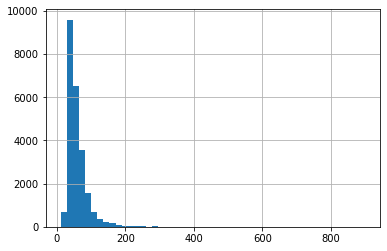

In [203]:
data['total_area'].hist(bins=50)

<AxesSubplot:>

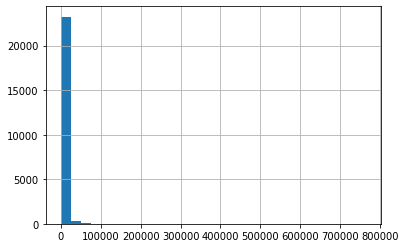

In [204]:
data['last_price'].hist(bins=30)

<AxesSubplot:>

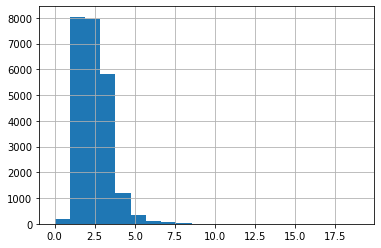

In [205]:
data['rooms'].hist(bins=20)

<AxesSubplot:>

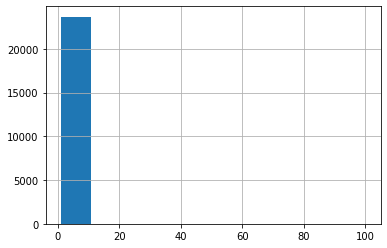

In [206]:
data['ceiling_height'].hist(bins=10)

Все данные заполнены. В столбце 'last_price' слишком высокое стандартное отклонение. Необходимо будет очистить данные от выпадающих значений. Гистограмма по 'total_area' и 'rooms' имеют нормальное распределение с небольшим скосом влево. Гистограммы 'last_price' и 'ceiling_heights' имеют слишком большие выбросы, поэтому гистограммы сложно анализировать.

### Изучите время продажи квартиры. 

Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

<AxesSubplot:>

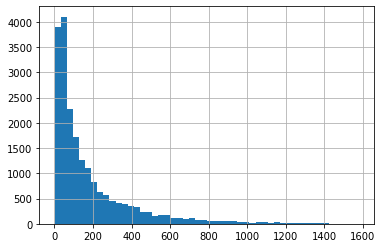

In [207]:
data['days_exposition'].hist(bins=50)

In [208]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение продажи 181 день. Но медианное значение 95 дней. Оптимальное время продажи от 45 до 232 дней. В таблице есть значения меньше 45 дней и больше 232, их лучше не учитывать для анализа.

In [209]:
data_clear = data.query('45 < days_exposition < 232') #Убираю редкие и выбивающиеся значения.

In [210]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m3,weekday_exposition,month_exposition,year_exposition,living_area_share,kitchen_area_share
count,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,21421.000000,23699.000000,...,8079.000000,18181.000000,9110.000000,20518.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,21421.000000
mean,9.858475,6541.548772,60.348651,2.070636,2.724358,10.671463,34.321982,5.892358,10.569807,0.591080,...,490.804555,0.770255,517.980900,180.888634,99.421656,2.569307,6.400101,2017.367146,0.563845,0.187355
std,5.682529,10887.013268,35.654083,1.078405,0.988298,6.595802,21.700627,4.885249,5.905438,0.959298,...,342.317995,0.938346,277.720643,219.727988,50.306802,1.789082,3.491561,1.039771,0.110933,0.072968
min,0.000000,12.190000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,0.111835,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3400.000000,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.000000,0.000000,...,288.000000,0.000000,294.000000,45.000000,76.585470,1.000000,3.000000,2017.000000,0.490326,0.133333
50%,9.000000,4650.000000,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.100000,0.000000,...,455.000000,1.000000,502.000000,95.000000,95.000000,3.000000,6.000000,2017.000000,0.566596,0.172414
75%,14.000000,6800.000000,69.900000,3.000000,2.700000,16.000000,42.700000,8.000000,12.000000,1.000000,...,612.000000,1.000000,729.000000,232.000000,114.256326,4.000000,10.000000,2018.000000,0.638298,0.232416
max,50.000000,763000.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1907.500000,6.000000,12.000000,2019.000000,1.514286,0.787879


In [211]:
data_clear.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m3,weekday_exposition,month_exposition,year_exposition,living_area_share,kitchen_area_share
count,10291.0000,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000,9076.000000,10291.000000,...,3370.000000,7812.000000,3840.000000,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000,9076.000000
mean,9.7354,5924.671596,57.716816,2.005539,2.694203,10.938490,32.747641,6.034982,10.299663,0.596152,...,491.646884,0.744240,526.775260,108.178991,96.072979,2.617433,6.562239,2017.377223,0.562241,0.189620
std,5.6268,8627.211598,31.517280,1.019188,0.561402,6.742999,19.172005,5.025140,5.367332,0.955146,...,344.269214,0.918869,275.664277,52.310390,41.249731,1.798359,3.442784,0.746591,0.111873,0.072191
min,0.0000,440.000000,12.000000,0.000000,1.750000,1.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,0.000000,16.000000,45.000000,9.615385,0.000000,1.000000,2015.000000,0.038462,0.025381
25%,6.0000,3350.000000,40.000000,1.000000,2.600000,5.000000,18.000000,2.000000,7.000000,0.000000,...,287.250000,0.000000,311.750000,61.000000,75.505102,1.000000,3.000000,2017.000000,0.487584,0.136101
50%,9.0000,4500.000000,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,453.500000,0.000000,510.500000,95.000000,93.283582,3.000000,7.000000,2017.000000,0.563786,0.175000
75%,14.0000,6390.000000,66.800000,3.000000,2.700000,16.000000,41.000000,8.000000,11.732500,1.000000,...,620.000000,1.000000,737.500000,146.000000,111.111111,4.000000,10.000000,2018.000000,0.635714,0.234487
max,50.0000,420000.000000,900.000000,19.000000,27.500000,60.000000,409.700000,32.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,231.000000,995.983936,6.000000,12.000000,2019.000000,1.514286,0.787879


Датасет очищен от выпадающих значений. в колонке Last_price значительно изменилось среднее значение, но видно что стандартное отклонение при этом значительно уменьшилось, значит данные остались более достоверные. По остальным столбцам изменения незначительны.

### Какие факторы больше всего влияют на стоимость квартиры? 

Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [212]:
data_clear['total_area'].corr(data_clear['last_price'])

0.7417052653396032

<AxesSubplot:xlabel='total_area'>

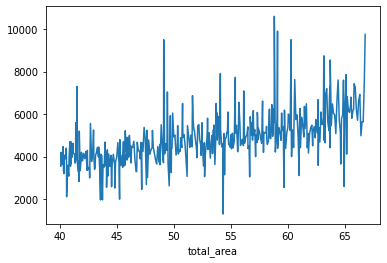

In [213]:
data_clear.query('40 < total_area < 66.8').groupby('total_area')['last_price'].mean().plot(x='last_price', y='total_area')

In [214]:
data_clear['rooms'].corr(data_clear['last_price'])

0.39345120446642307

<AxesSubplot:xlabel='rooms'>

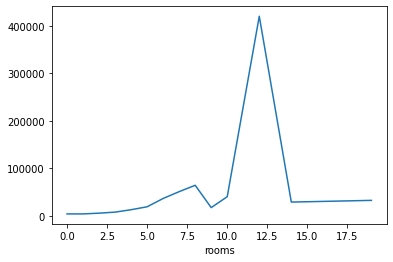

In [215]:
data_clear.groupby('rooms')['last_price'].mean().plot(x='last_price', y='rooms')

In [216]:
data_clear['cityCenters_nearest'].describe()

count     7812.000000
mean     14515.640937
std       8371.231338
min        208.000000
25%       9833.500000
50%      13302.500000
75%      16506.750000
max      64857.000000
Name: cityCenters_nearest, dtype: float64

In [217]:
data_clear['cityCenters_nearest'].corr(data_clear['last_price'])

-0.2076462283088796

<AxesSubplot:xlabel='cityCenters_nearest'>

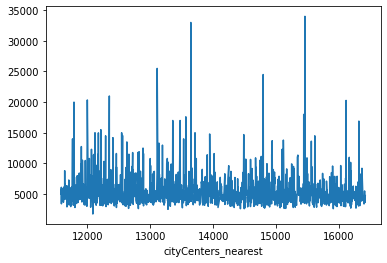

In [218]:
data_clear.query('11577 <cityCenters_nearest < 16422').groupby('cityCenters_nearest')['last_price'].mean().plot(x='last_price', y='cityCenters_nearest')

На графике видна зависимость цены от площади помещения. Количество комнат от 1 до 3 влияет на цену, от 3 до 5 - влияние на цену незначительное. Удаленность от центра на цену не влияет. 

### Выберите 10 населённых пунктов с наибольшим числом объявлений. 

Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [219]:
data_clear['locality_name'].value_counts().head(10)

Санкт-Петербург      6676
посёлок Мурино        258
посёлок Шушары        229
Всеволожск            171
Колпино               164
посёлок Парголово     158
Пушкин                146
деревня Кудрово       146
Гатчина               140
Выборг                116
Name: locality_name, dtype: int64

In [220]:
data_pivot = data_clear.pivot_table(index='locality_name',
                values='price_m3',
                aggfunc=['count', 'mean'])

In [221]:
data_pivot.columns = ['price_count', 'price_mean']

In [222]:
data_piv_sort = data_pivot.sort_values('price_count', ascending=False).head(10)

In [223]:
data_piv_sort.sort_values('price_mean', ascending=False)

,price_count,price_mean
locality_name,,
Санкт-Петербург,6676,110.900250
Пушкин,146,99.825677
деревня Кудрово,146,92.616432
посёлок Парголово,158,88.677462
посёлок Мурино,258,85.569498
посёлок Шушары,229,78.724576
Колпино,164,74.419518
Всеволожск,171,67.593995
Гатчина,140,66.970028


Самая высокая стоимость жилья в г. Санкг-Петербург, самая низкая - в г. Выборг

### Изучите предложения квартир: 

для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [224]:
data_spb = data_clear.query('locality_name=="Санкт-Петербург"')

In [225]:
data_spb['center_distance'] = round(data_spb['cityCenters_nearest']/1000)

In [226]:
data_spb['center_distance'].corr(data_spb['last_price'])

-0.25239782002244715

<AxesSubplot:xlabel='center_distance'>

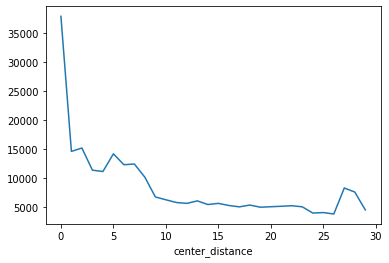

In [227]:
data_spb.groupby('center_distance')['last_price'].mean().plot()

Средняя цена держится примерно на одном уровне до 7 км, затем снижается, можно сделать вывод что цена зависит от расстояния до центра.

### Выделите сегмент квартир в центре.

 Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [228]:
data_spb_center = data_spb.query('center_distance < 7')

In [229]:
data_spb['rooms'].corr(data_spb['last_price'])

0.4092316741594768

<AxesSubplot:xlabel='rooms'>

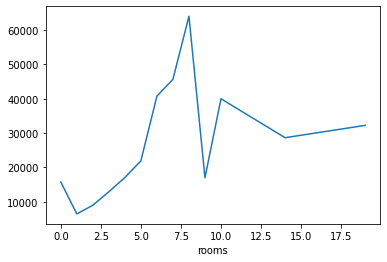

In [230]:
data_spb_center.groupby('rooms')['last_price'].mean().plot()

In [231]:
data_spb['floor'].corr(data_spb['last_price'])

0.024595610794048674

<AxesSubplot:xlabel='floor'>

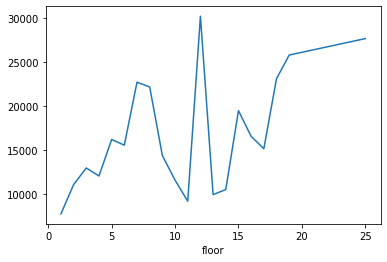

In [232]:
data_spb_center.groupby('floor')['last_price'].mean().plot()

In [233]:
data_spb['center_distance'].corr(data_spb['last_price'])

-0.25239782002244715

<AxesSubplot:xlabel='center_distance'>

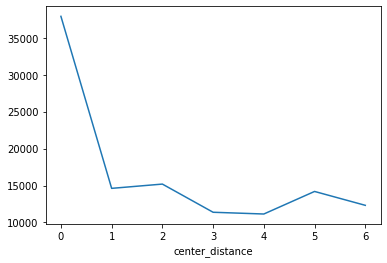

In [234]:
data_spb_center.groupby('center_distance')['last_price'].mean().plot()

<AxesSubplot:xlabel='first_day_exposition'>

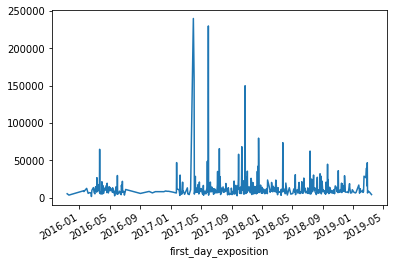

In [235]:
data_spb_center.groupby('first_day_exposition')['last_price'].mean().plot()

На графиках видна зависимость цены от удаленности от центра. Дата размещения объявления и этаж не влияют на цену помещения. Количество комнат до 7 влияет на цену, далее влияние на цену незначительное.

## Общий вывод

Получены данные архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В таблице были пропущены важные для анализа данные, некоторые были заменены на медианное значение, некоторые оставила без изменения, т.к. исправление могло исказить результат анализа.
Сначала был проведен анализ всей базы объявлений. Была выявлена зависимость цены квартиры от площади и удаленности от центра.
Далее проведен анализ квартир, расположенных в центре Санкт-Петербурга. Также видна зависимости цены от удаленности от центра.  